## Análisis del archivo de entrenamiento de resumenes

     student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0020ae56ffbf    ebad26  They would rub it up with soda to make the sme...   
2  004e978e639e    3b9047  In Egypt, there were many occupations and soci...   
3  005ab0199905    3b9047  The highest class was Pharaohs these people we...   
4  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   

    content   wording  
0  0.205683  0.380538  
1 -0.548304  0.506755  
2  3.128928  4.231226  
3 -0.210614 -0.471415  
4  3.272894  3.219757  
           content      wording
count  7165.000000  7165.000000
mean     -0.014853    -0.063072
std       1.043569     1.036048
min      -1.729859    -1.962614
25%      -0.799545    -0.872720
50%      -0.093814    -0.081769
75%       0.499660     0.503833
max       3.900326     4.310693
Las 10 palabras más comunes en 'text' son: ['bad' 'gods' 'good' 'meat' 'people' 'slaves

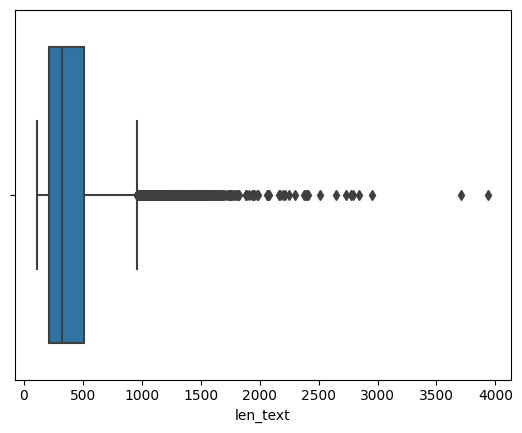

Valores únicos en 'prompt_id': 4
Longitud promedio del texto: 418.776971388695


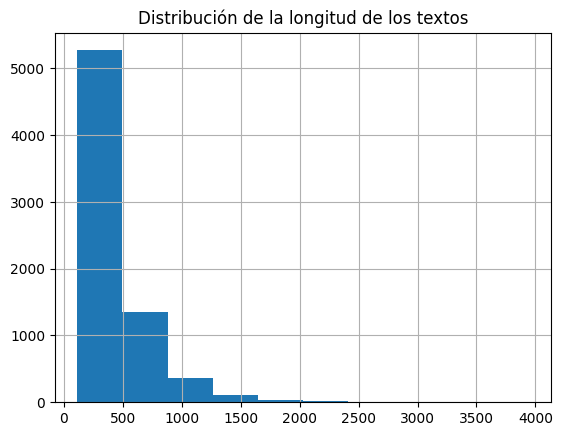

Número de estudiantes únicos:  7165


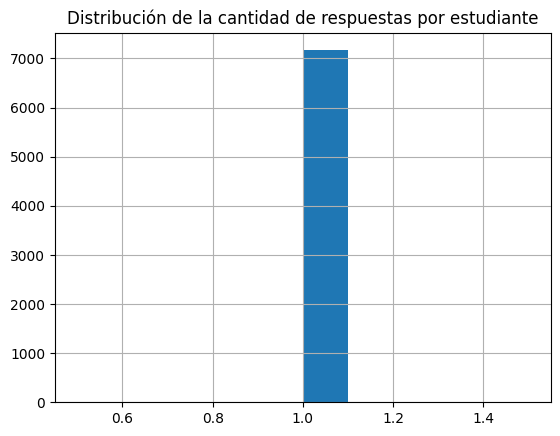

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Cargamos los datos de los cuatro archivos csv
df_summaries_train = pd.read_csv('data/summaries_train.csv')

# Verificamos que se hayan cargado bien, mostrando las primeras filas de cada uno
print(df_summaries_train.head())

# Generamos estadísticas descriptivas para las columnas numéricas de df_summaries_test
print(df_summaries_train.describe())

# Usamos CountVectorizer para analizar las palabras más frecuentes en 'prompt_text'
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df_summaries_train['text'].values.astype('U'))  # Convierte los NaN en cadena vacía
top_words = vectorizer.get_feature_names_out()
print('Las 10 palabras más comunes en \'text\' son:', top_words)

# Como ejemplo, suponemos que la variable 'text' es de formato string y deseamos conocer la cantidad de caracteres en ella,
# generamos una nueva columna en el dataframe con dicha información
df_summaries_train['len_text'] = df_summaries_train['text'].str.len()

# Generamos un gráfico para visualizar la distribución de las longitudes de 'text'
sns.boxplot(x=df_summaries_train['len_text'])
plt.show()

# Listamos la cantidad de valores distintos en la columna 'prompt_id'
print("Valores únicos en 'prompt_id':", df_summaries_train['prompt_id'].nunique())

# Exploración de las columnas de texto y categorías
# Agrega una columna con la longitud del texto
df_summaries_train['text_length'] = df_summaries_train['text'].str.len()

# Muestra la longitud promedio del texto
print('Longitud promedio del texto:', df_summaries_train['text_length'].mean())

# Histograma de las longitudes de 'text'
df_summaries_train['text_length'].hist()
plt.title('Distribución de la longitud de los textos')
plt.show()

# Analizar cantidad de 'student_id' únicos
num_unique_students = df_summaries_train['student_id'].nunique()
print('Número de estudiantes únicos: ', num_unique_students)

# Analizar cuántas veces cada estudiante aparece en el dataset
student_counts = df_summaries_train['student_id'].value_counts()
student_counts.hist()
plt.title('Distribución de la cantidad de respuestas por estudiante')
plt.show()


## Análisis del archivo de entrenamiento de prompts

  prompt_id                                    prompt_question  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   
1    3b9047  In complete sentences, summarize the structure...   
2    814d6b  Summarize how the Third Wave developed over su...   
3    ebad26  Summarize the various ways the factory would u...   

                prompt_title  \
0                 On Tragedy   
1  Egyptian Social Structure   
2             The Third Wave   
3    Excerpt from The Jungle   

                                         prompt_text  
0  Chapter 13 \r\nAs the sequel to what has alrea...  
1  Egyptian society was structured like a pyramid...  
2  Background \r\nThe Third Wave experiment took ...  
3  With one member trimming beef in a cannery, an...  
       prompt_id                                    prompt_question  \
count          4                                                  4   
unique         4                                                  4   
top       39c16e  Su

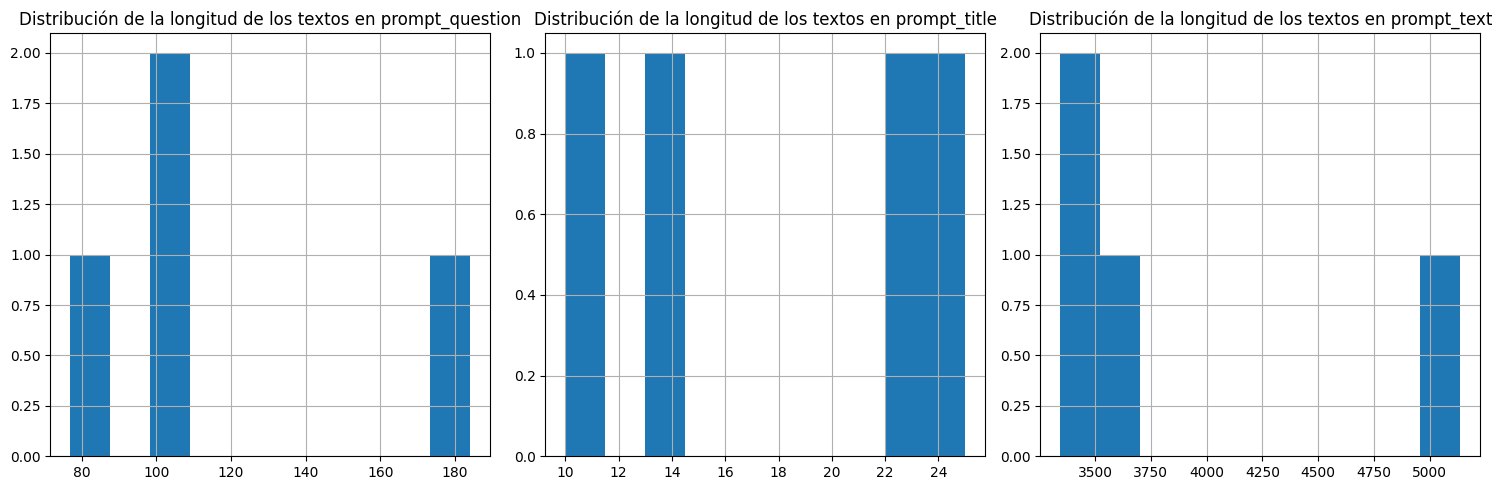

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

df_prompts_train = pd.read_csv('data/prompts_train.csv')

# Muestra las primeras filas para verificar que datos se hayan cargado correctamente
print(df_prompts_train.head())

print(df_prompts_train.describe())

# Agregamos columnas con la longitud del texto
for col in ['prompt_question', 'prompt_title', 'prompt_text']:
    df_prompts_train[f'{col}_length'] = df_prompts_train[col].str.len()
    
# Muestra la longitud promedio de los textos en cada columna
for col in ['prompt_question', 'prompt_title', 'prompt_text']:
    print(f'Longitud promedio de {col}:', df_prompts_train[f'{col}_length'].mean())

# Usamos CountVectorizer para analizar las palabras más frecuentes en 'prompt_text'
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df_prompts_train['prompt_text'].values.astype('U'))  # Convierte los NaN en cadena vacía
top_words = vectorizer.get_feature_names_out()
print('Las 10 palabras más comunes en \'prompt_text\' son:', top_words)

# Genera gráficos para las longitudes
plt.figure(figsize=(15, 5))
for i, col in enumerate(['prompt_question', 'prompt_title', 'prompt_text']):
    plt.subplot(1, 3, i + 1)
    df_prompts_train[f'{col}_length'].hist()
    plt.title(f'Distribución de la longitud de los textos en {col}')
plt.tight_layout()
plt.show()